In [1]:
import pandas as pd

In [91]:
import matplotlib.pyplot as plt

In [157]:
import numpy as np

In [2]:
vr = pd.read_csv('video_review.csv')

In [14]:
vr.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes


In [5]:
pprd = pd.read_csv('play_player_role_data.csv')

In [7]:
pprd.head()

,Season_Year,GameKey,PlayID,GSISID,Role
0,2017,414,188,33704,PDL2
1,2017,414,1107,33704,PDL2
2,2017,424,1113,33704,PDR3
3,2017,424,1454,33704,PLR2
4,2017,424,644,33704,PRG


In [23]:
ppd = pd.read_csv('player_punt_data.csv')

In [24]:
ppd.head()

,GSISID,Number,Position
0,32069,36,SS
1,30095,11,WR
2,31586,22,FS
3,29520,35,SS
4,30517,51,OLB


In [9]:
pi = pd.read_csv('play_information.csv')

In [10]:
pi.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."


In [17]:
gd = pd.read_csv('game_data.csv')

In [18]:
gd.head()

,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


In [20]:
len(gd['GameKey'].unique())

666

### Merge df's to get player role in punt play and normal position

In [21]:
df1 = pd.merge(vr, pprd.drop(columns='Season_Year'), how='left', on=['GameKey', 'PlayID', 'GSISID'], copy=False)

In [25]:
df1 = pd.merge(df1, ppd.drop(columns='Number'), how='left', on='GSISID', copy=False)

In [45]:
pi.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."


In [46]:
pi.columns

Index(['Season_Year', 'Season_Type', 'GameKey', 'Game_Date', 'Week', 'PlayID',
       'Game_Clock', 'YardLine', 'Quarter', 'Play_Type', 'Poss_Team',
       'Home_Team_Visit_Team', 'Score_Home_Visiting', 'PlayDescription'],
      dtype='object')

In [47]:
pi_cols_to_drop = ['Season_Year', 'Season_Type', 'Game_Date', 'Week',
       'Quarter', 'Play_Type', 'Poss_Team',
       'Home_Team_Visit_Team', 'PlayDescription']

In [48]:
df1 = pd.merge(df1, pi.drop(columns=pi_cols_to_drop), how='left', on=['GameKey', 'PlayID'], copy=False)

In [49]:
df1.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire,Role,Position,Game_Clock,YardLine,Score_Home_Visiting
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No,PLW,RB,03:44,CHI 31,0 - 22
1,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No,PLW,RB,03:44,CHI 31,0 - 22
2,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No,GL,WR,05:52,TEN 45,10 - 13
3,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No,GR,WR,04:46,NYJ 22,0 - 0
4,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No,PRT,ILB,08:29,NYG 46,0 - 0


In [27]:
df1['Role'].value_counts()

PLW     9
PRG     6
PLG     6
PLT     5
PR      5
GL      5
PLS     4
PRW     3
PDL2    3
PLL     2
PPR     2
PRT     2
VR      2
GR      1
P       1
PFB     1
PDR1    1
Name: Role, dtype: int64

### pull out data for first injury in video_review table

In [15]:
vr.loc[0]

Season_Year                                   2016
GameKey                                          5
PlayID                                        3129
GSISID                                       31057
Player_Activity_Derived                   Tackling
Turnover_Related                                No
Primary_Impact_Type                 Helmet-to-body
Primary_Partner_GSISID                       32482
Primary_Partner_Activity_Derived           Tackled
Friendly_Fire                                   No
Name: 0, dtype: object

In [72]:
ngs_16_pre = pd.read_csv('NGS-2016-pre.csv', parse_dates=['Time'])

In [114]:
ngs_16_pre.sort_values(by='Time', ascending=True, inplace=True)

In [115]:
ngs_16_pre.head()

,Season_Year,GameKey,PlayID,GSISID,Time,x,y,dis,o,dir,Event
1752274,2016,17,273,30140.0,2016-08-11 23:14:02.200,38.75,23.389999,0.01,345.290009,181.940002,punt_play
1752278,2016,17,273,32181.0,2016-08-11 23:14:02.200,51.32,22.280001,0.10,355.260010,82.400002,punt_play
1752277,2016,17,273,32372.0,2016-08-11 23:14:02.200,51.77,41.430000,0.02,29.420000,358.869995,punt_play
1752267,2016,17,273,24535.0,2016-08-11 23:14:02.200,54.34,28.500000,0.04,205.910004,205.529999,punt_play
1752276,2016,17,273,27704.0,2016-08-11 23:14:02.200,50.66,21.400000,0.16,3.040000,91.550003,punt_play


In [75]:
ngs_16_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824901 entries, 0 to 6824900
Data columns (total 11 columns):
Season_Year    int64
GameKey        int64
PlayID         int64
GSISID         float64
Time           datetime64[ns]
x              float64
y              float64
dis            float64
o              float64
dir            float64
Event          object
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 572.8+ MB


In [33]:
def get_play_info(gk, pid):
    return pi[(pi['GameKey'] == gk) & (pi['PlayID'] == pid)]

In [97]:
def get_play_ngs(gk, pid, df):
    new_df = df[(df['GameKey'] == gk) & (df['PlayID'] == pid)]
    new_df = new_df.drop(columns=['GameKey', 'PlayID', 'Season_Year'])
    return new_df

In [31]:
pi1 = get_play_info(5, 3129)

In [32]:
pi1

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
35,2016,Pre,5,08/11/2016,2,3129,03:44,CHI 31,3,Punt,CHI,CHI-DEN,0 - 22,(3:44) (Punt formation) P.O'Donnell punts 58 y...


In [119]:
ngs1 = get_play_ngs(5, 3129, ngs_16_pre)

In [120]:
ngs1.head()

,GSISID,Time,x,y,dis,o,dir,Event
205800,30705.0,2016-08-12 02:07:25.100,75.360001,24.299999,0.01,27.469999,303.019989,punt_play
205553,27718.0,2016-08-12 02:07:25.100,76.750000,28.570000,0.05,20.850000,87.769997,punt_play
205793,31057.0,2016-08-12 02:07:25.100,83.470001,22.209999,0.06,155.649994,307.399994,punt_play
205555,33064.0,2016-08-12 02:07:25.100,66.669998,49.450001,0.00,159.669998,270.000000,punt_play
205794,28041.0,2016-08-12 02:07:25.100,80.260002,28.420000,0.04,152.570007,306.989990,punt_play


In [41]:
len(ngs1)

5962

In [147]:
ngs1['dt'] = ngs1.groupby('GSISID')['Time'].diff()

In [148]:
ngs1['dt'].describe()

count                      5939
mean     0 days 00:00:00.100387
std      0 days 00:00:00.024240
min      0 days 00:00:00.100000
25%      0 days 00:00:00.100000
50%      0 days 00:00:00.100000
75%      0 days 00:00:00.100000
max      0 days 00:00:01.900000
Name: dt, dtype: object

In [125]:
max_time = ngs1['dt'].describe()['max']

In [126]:
ngs1[ngs1['dt'] == max_time]

,GSISID,Time,x,y,dis,o,dir,Event,dt
202065,31209.0,2016-08-12 02:07:41.200,61.68,-0.37,0.83,218.929993,283.059998,NaN,00:00:01.900000


In [131]:
ngs1[(ngs1['GSISID'] == 31209.0) & (ngs1['Time'] > '2016-08-12 02:07:39') & (ngs1['Time'] < '2016-08-12 02:07:42')]

,GSISID,Time,x,y,dis,o,dir,Event,dt
201845,31209.0,2016-08-12 02:07:39.100,75.230003,0.04,0.49,209.410004,239.009995,NaN,00:00:00.100000
201856,31209.0,2016-08-12 02:07:39.200,74.800003,-0.25,0.52,211.880005,242.009995,NaN,00:00:00.100000
201867,31209.0,2016-08-12 02:07:39.300,74.379997,-0.49,0.49,214.490005,244.990005,NaN,00:00:00.100000
202065,31209.0,2016-08-12 02:07:41.200,61.680000,-0.37,0.83,218.929993,283.059998,NaN,00:00:01.900000
202076,31209.0,2016-08-12 02:07:41.300,60.830002,-0.11,0.89,216.360001,284.019989,NaN,00:00:00.100000
202087,31209.0,2016-08-12 02:07:41.400,59.970001,0.16,0.90,223.759995,284.760010,NaN,00:00:00.100000
202098,31209.0,2016-08-12 02:07:41.500,59.110001,0.42,0.90,225.330002,284.950012,NaN,00:00:00.100000
201523,31209.0,2016-08-12 02:07:41.600,58.200001,0.68,0.95,225.279999,285.450012,NaN,00:00:00.100000
201534,31209.0,2016-08-12 02:07:41.700,57.279999,0.94,0.96,225.279999,285.559998,NaN,00:00:00.100000
201545,31209.0,2016-08-12 02:07:41.800,56.349998,1.19,0.96,240.440002,285.790009,NaN,00:00:00.100000


In [132]:
ngs1[(ngs1['GSISID'] == 27718.0) & (ngs1['Time'] > '2016-08-12 02:07:39') & (ngs1['Time'] < '2016-08-12 02:07:42')]

,GSISID,Time,x,y,dis,o,dir,Event,dt
204581,27718.0,2016-08-12 02:07:39.100,83.339996,27.920000,0.38,93.180000,162.610001,NaN,00:00:00.100000
204265,27718.0,2016-08-12 02:07:39.200,83.309998,27.650000,0.27,103.449997,171.399994,NaN,00:00:00.100000
204276,27718.0,2016-08-12 02:07:39.300,83.230003,27.480000,0.19,114.870003,179.529999,NaN,00:00:00.100000
204287,27718.0,2016-08-12 02:07:39.400,83.139999,27.330000,0.17,127.959999,186.089996,NaN,00:00:00.100000
204298,27718.0,2016-08-12 02:07:39.500,83.050003,27.230000,0.14,142.619995,191.779999,NaN,00:00:00.100000
204040,27718.0,2016-08-12 02:07:39.600,82.959999,27.120001,0.14,156.940002,196.740005,NaN,00:00:00.100000
204051,27718.0,2016-08-12 02:07:39.700,82.879997,26.969999,0.17,169.270004,201.059998,NaN,00:00:00.100000
204062,27718.0,2016-08-12 02:07:39.800,82.779999,26.809999,0.19,178.250000,205.229996,NaN,00:00:00.100000
204963,27718.0,2016-08-12 02:07:39.900,82.669998,26.650000,0.20,183.520004,208.539993,NaN,00:00:00.100000
204973,27718.0,2016-08-12 02:07:40.000,82.470001,26.459999,0.27,185.770004,211.100006,NaN,00:00:00.100000


There is ~ 1 second of data missing for GSISID 31209, which is not the player that got injured (31057)

### Calculate distance from x & y

In [152]:
ngs1['dt'] = ngs1['dt'].apply(lambda x: x.total_seconds())

In [153]:
ngs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962 entries, 205800 to 205859
Data columns (total 9 columns):
GSISID    5962 non-null float64
Time      5962 non-null datetime64[ns]
x         5962 non-null float64
y         5962 non-null float64
dis       5962 non-null float64
o         5962 non-null float64
dir       5962 non-null float64
Event     175 non-null object
dt        5939 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 625.8+ KB


In [159]:
ngs1['dx'] = ngs1.groupby('GSISID')['x'].diff()
ngs1['dy'] = ngs1.groupby('GSISID')['y'].diff()
ngs1['dist'] = np.sqrt(ngs1['dx']**2 + ngs1['dy']**2) * 0.9144

In [161]:
ngs1['speed'] = ngs1['dist'] / ngs1['dt']

In [170]:
ngs1['d_speed'] = ngs1.groupby('GSISID')['speed'].diff()

In [171]:
ngs1['accel'] = ngs1['d_speed'] / ngs1['dt']

In [172]:
ngs1.tail()

,GSISID,Time,x,y,dis,o,dir,Event,dt,speed,dx,dy,dist,accel,d_speed
205862,32477.0,2016-08-12 02:07:51.900,32.139999,10.42,0.23,341.799988,17.520000,play_submit,0.1,2.126834,0.099998,0.21,0.212683,3.918758e+00,3.918758e-01
205850,31902.0,2016-08-12 02:07:51.900,42.730000,5.70,0.19,83.349998,139.919998,play_submit,0.1,1.686068,0.139999,-0.12,0.168607,-7.044707e-01,-7.044707e-02
205856,32460.0,2016-08-12 02:07:51.900,41.419998,7.03,0.04,189.070007,339.329987,play_submit,0.1,0.365764,0.000000,0.04,0.036576,-2.743132e+00,-2.743132e-01
205860,27718.0,2016-08-12 02:07:51.900,38.340000,5.94,0.11,219.149994,308.989990,play_submit,0.1,1.066370,-0.060001,0.10,0.106637,-1.258377e+00,-1.258377e-01
205859,32489.0,2016-08-12 02:07:51.900,32.520000,8.46,0.15,334.959991,28.940001,play_submit,0.1,1.350095,0.070000,0.13,0.135010,7.616130e-13,7.616130e-14


In [182]:
ngs1_p1 = ngs1[ngs1['GSISID'] == 31057]

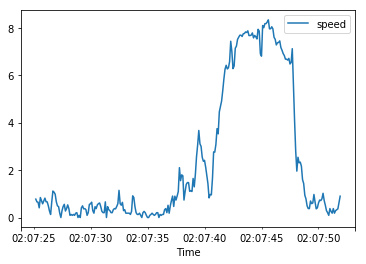

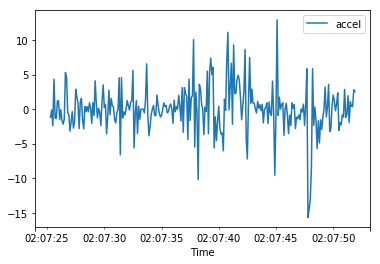

In [174]:
ngs1_p1.plot(x='Time', y='speed')
ngs1_p1.plot(x='Time', y='accel')

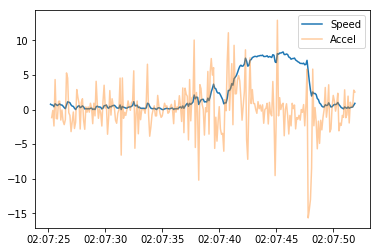

In [177]:
xs = ngs1_p1['Time']
plt.plot(xs, ngs1_p1['speed'], label='Speed')
plt.plot(xs, ngs1_p1['accel'], label='Accel', alpha=0.4)
plt.legend();

In [173]:
ngs1_p1 = ngs1[ngs1['GSISID'] == 31057]

In [ ]:
32482

In [178]:
def plot_player_speed(gid):
    ngs1_p1 = ngs1[ngs1['GSISID'] == gid]
    xs = ngs1_p1['Time']
    plt.plot(xs, ngs1_p1['speed'], label='Speed')
    plt.plot(xs, ngs1_p1['accel'], label='Accel', alpha=0.4)
    plt.title(f'Player ID {gid}')
    plt.legend();

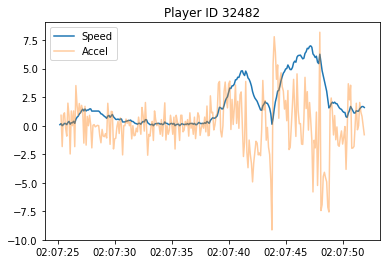

In [179]:
plot_player_speed(32482)

Does injured player experience the highest deceleration?

In [180]:
ngs1['accel'].describe()

count    5916.000000
mean        0.076367
std         4.499360
min       -29.509120
25%        -1.130122
50%         0.000000
75%         1.130364
max       268.335944
Name: accel, dtype: float64

In [183]:
ngs1_p1['accel'].describe()

count    2.670000e+02
mean     4.670167e-03
std      3.411310e+00
min     -1.568354e+01
25%     -1.495045e+00
50%     -2.298162e-13
75%      1.203802e+00
max      1.292479e+01
Name: accel, dtype: float64

In [ ]:
plt.figure(figsize=(8,5))
inj_id = 31057
for x in ngs1['GSISID']:
    if x == inj_id:
        color = 'r'
    else:
        color = 'b'
    df = ngs1[ngs1['GSISID'] == x]
    plt.plot(df['Time'], df['accel'])
    

In [ ]:
for x in ngs1['GSISID']:
    print(x)